This model uses CNN to recognize handwritten English letters using the EMNIST dataset. Accuracy graph and prediction samples are shown.

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/incomplete.T6R1MX_3.1.0/emnist-train.tfrecord*...:   0%|   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/letters/incomplete.T6R1MX_3.1.0/emnist-test.tfrecord*...:   0%|    …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/letters/3.1.0. Subsequent calls will reuse this data.
Epoch 1/5
694/694 ━━━━━━━━━━━━━━━━━━━━ 87s 123ms/step - accuracy: 0.6716 - loss: 1.1195 - val_accuracy: 0.8774 - val_loss: 0.3809
Epoch 2/5
694/694 ━━━━━━━━━━━━━━━━━━━━ 135s 114ms/step - accuracy: 0.8969 - loss: 0.3150 - val_accuracy: 0.8975 - val_loss: 0.3103
Epoch 3/5
694/694 ━━━━━━━━━━━━━━━━━━━━ 82s 113ms/step - accuracy: 0.9193 - loss: 0.2436 - val_accuracy: 0.9045 - val_loss: 0.2864
Epoch 4/5
694/694 ━━━━━━━━━━━━━━━━━━━━ 83s 115ms/step - accuracy: 0.9314 - loss: 0.2062 - val_accuracy: 0.9106 - val_loss: 0.2726
Epoch 5/5
694/694 ━━━━━━━━━━━━━━━━━━━━ 89s 125ms/step - accuracy: 0.9388 - loss: 0.1813 - val_accuracy: 0.9130 - val_loss: 0.2670


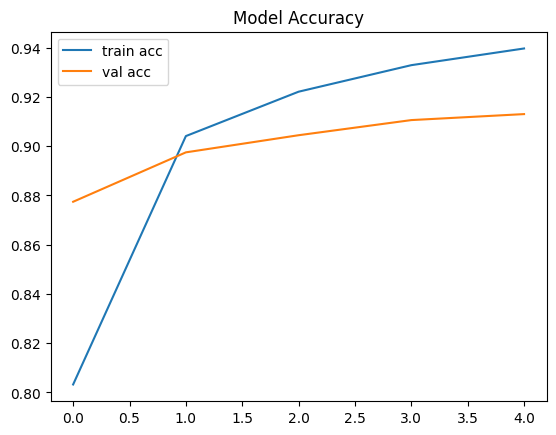

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 


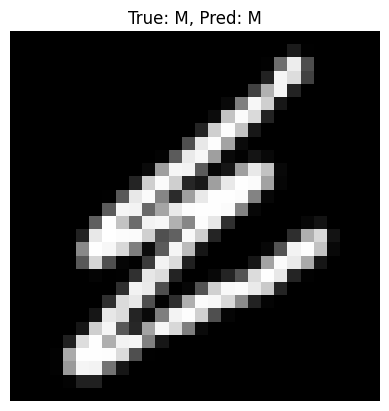

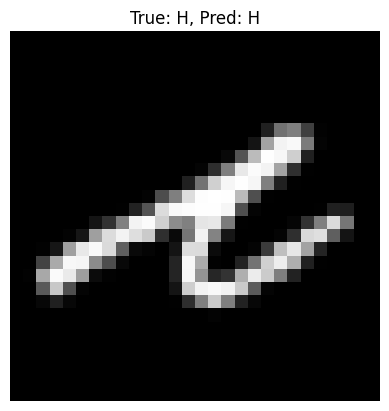

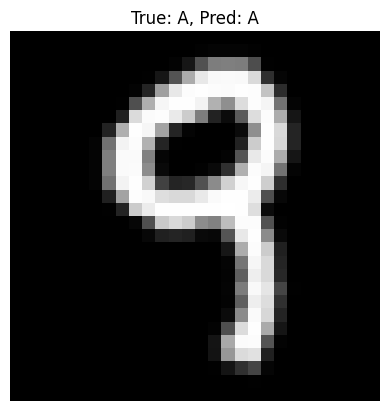

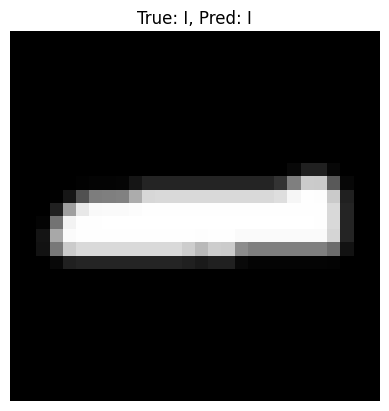

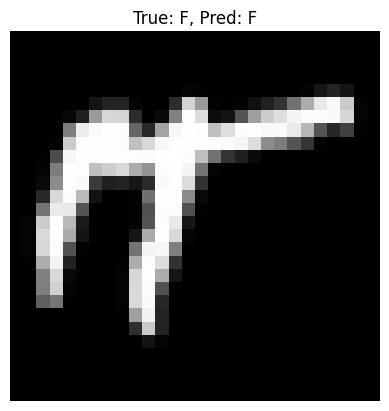

In [ ]:
!pip install tensorflow keras matplotlib


import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


import tensorflow_datasets as tfds
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/letters',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)


def normalize_img(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label - 1  # to make labels 0-25 (A-Z)

ds_train = ds_train.map(normalize_img).batch(128).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(normalize_img).batch(128).prefetch(tf.data.AUTOTUNE)


model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(26, activation='softmax')  # 26 classes (A-Z)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(ds_train, epochs=5, validation_data=ds_test)


plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Model Accuracy")
plt.show()


for images, labels in ds_test.take(1):
    pred = model.predict(images)
    for i in range(5):
        plt.imshow(tf.squeeze(images[i]), cmap='gray')
        plt.title(f"True: {chr(labels[i]+65)}, Pred: {chr(np.argmax(pred[i])+65)}")
        plt.axis('off')
        plt.show()




